### Lesson -3 Unvariate exploartion of Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pokemon = pd.read_csv('files/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


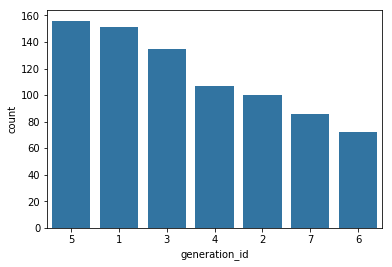

In [40]:
base_color = sb.color_palette()[0]
gen_order = pokemon.generation_id.value_counts().index
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order)


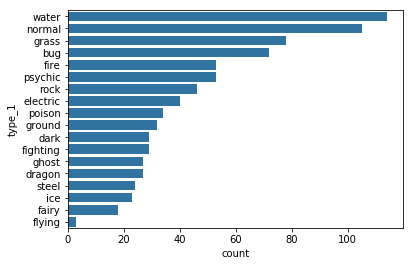

In [4]:
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order)


In [41]:
pokemon.type_2.value_counts()

flying      95
ground      32
poison      32
psychic     29
fairy       29
fighting    25
steel       23
grass       19
dragon      18
dark        17
water       17
ghost       16
rock        14
ice         11
fire        11
electric     8
bug          5
normal       4
Name: type_2, dtype: int64

In [42]:
type_counts = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level', value_name = 'type').dropna()



In [43]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [8]:
type_counts.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


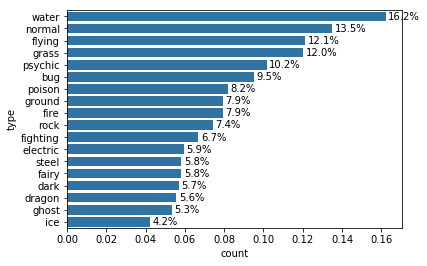

In [48]:
type_count = type_counts.type.value_counts()
type_order = type_count.index

sb.countplot(data = type_counts, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props*n_pokemon, tick_names);

for i in range(type_count.shape[0]):
    count = type_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center')
    

In [ ]:
type_count.shape

In [46]:
n_pokemon = pokemon.shape[0]
max_type_count = type_count[0]
max_prop = max_type_count/n_pokemon
max_prop

0.1623296158612144

In [47]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

### Histograms

#### Using matplotlib

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

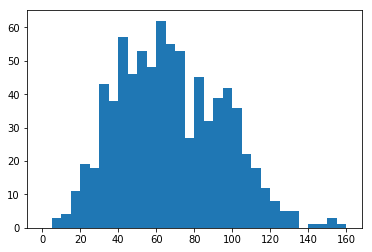

In [49]:
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x='speed', bins = bin_edges )

In [ ]:
bin_edges

#### Using seaborn

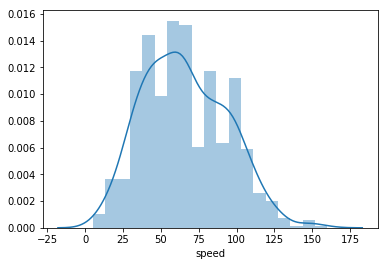

In [50]:
sb.distplot(pokemon.speed)

In [ ]:
pokemon.head()

(array([ 0.,  0.,  0.,  0.,  6., 12., 29., 28., 49., 53., 66., 59., 63.,
        53., 57., 51., 52., 42., 37., 34., 29., 18., 14., 11., 10.,  4.,
        12.,  4.,  3.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230]),
 <a list of 46 Patch objects>)

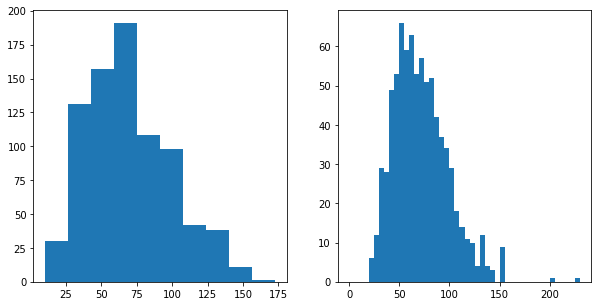

In [51]:
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.hist(data = pokemon, x = 'special-attack')

bin_edges = np.arange(0, pokemon['special-defense'].max()+5, 5)
plt.subplot(1, 2, 2)
plt.hist(data = pokemon, x = 'special-defense', bins = bin_edges)

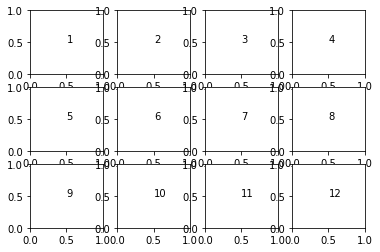

In [52]:
fig, axes = plt.subplots(3, 4)
axes = axes.flatten()
for i in range(12):
    plt.sca(axes[i])
    plt.text(0.5, 0.5, i+1)

(0, 6)

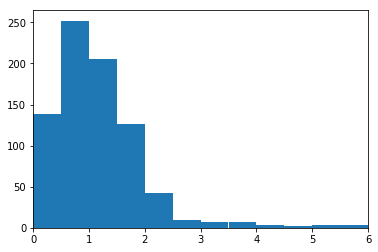

In [53]:
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bins);
plt.xlim((0, 6))

In [54]:
np.log10(pokemon.weight.describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

([<matplotlib.axis.XTick at 0x7f4ac2cc5f28>,
 <a list of 9 Text xticklabel objects>)

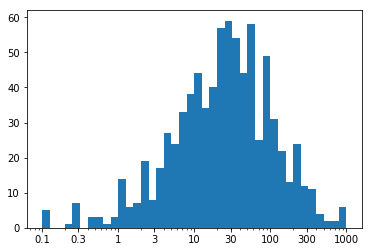

In [55]:
log_bins = 10**np.arange(-1, np.log10(pokemon.weight).max()+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=log_bins)
plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

In [56]:
np.log10(pokemon.weight).max()

2.9999565683801923

### Bivariate data visualization

In [61]:
df = pd.read_csv('files/fuel-econ.csv')
df.head()


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

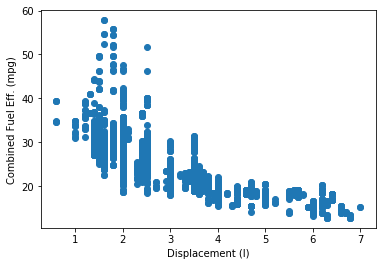

In [11]:
plt.scatter(data = df, x = 'displ', y = 'comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

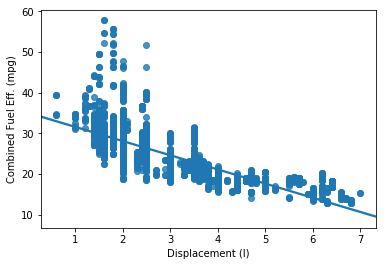

In [62]:
# usin seaborn library
sb.regplot(data = df, x = 'displ', y = 'comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');


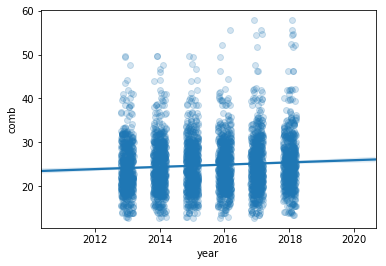

In [13]:
sb.regplot(data = df, x = 'year', y = 'comb', x_jitter = 0.2, scatter_kws = {'alpha': 1/5}) # here jitter for more noise

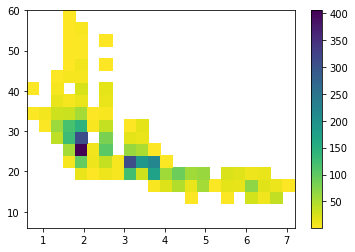

In [63]:
xbin_edges = np.arange(0.6, df.displ.max()+0.3, 0.3)
ybin_edges = np.arange(6, df.comb.max()+ 3, 3)
plt.hist2d(data = df, x = 'displ', y = 'comb', cmin = 0.1, cmap = 'viridis_r', bins = [xbin_edges, ybin_edges]);
plt.colorbar()

In [15]:
df[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


### Violin plots

In [64]:
df.VClass.value_counts().index
car_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = car_classes)
df['VClass'] = df['VClass'].astype(vclasses)

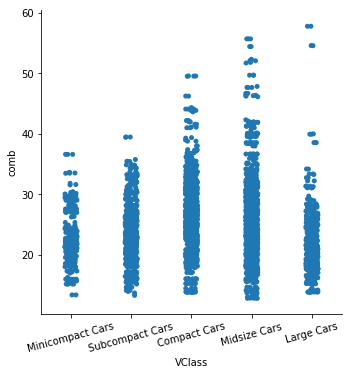

In [66]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'VClass', y = 'comb', color = base_color);
plt.xticks(rotation = 15);

In [36]:
base_color = sb.color_palette()[0]
sb.catplot(data = df, x = 'VClass', y = 'comb', color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

ValueError: Could not interpret input 'VClass'

### Box plots

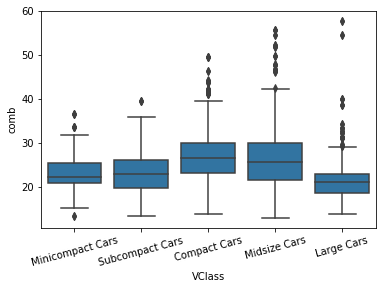

In [19]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'VClass', y = 'comb', color = base_color);
plt.xticks(rotation = 15);

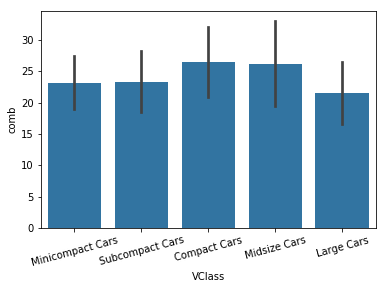

In [20]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'VClass', y = 'comb', color = base_color, ci = 'sd');
plt.xticks(rotation = 15);

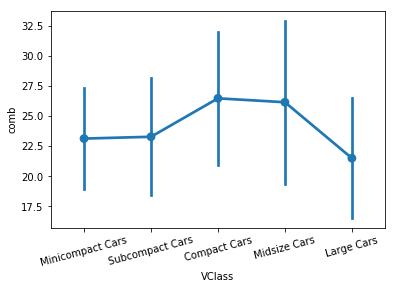

In [21]:
base_color = sb.color_palette()[0]
sb.pointplot(data = df, x = 'VClass', y = 'comb', color = base_color, ci = 'sd');
plt.xticks(rotation = 15);

### Clustered bar charts

In [24]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


In [69]:
df['trans_type'] = df['trans'].apply(lambda x: x.split()[0])

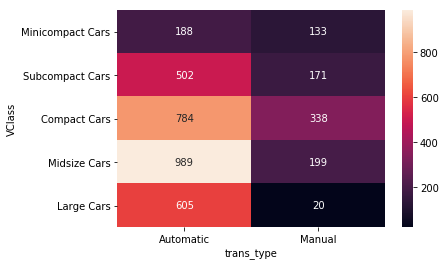

In [26]:
sb.heatmap(ct_counts, annot = True, fmt = 'd'); # annot for labeling and fmt for representing on decimal numbers

In [25]:
ct_counts = df.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')


In [ ]:
ct_counts

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

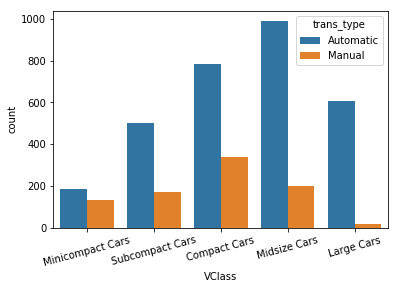

In [27]:
sb.countplot(data = df, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation = 15)

### Faceted plots

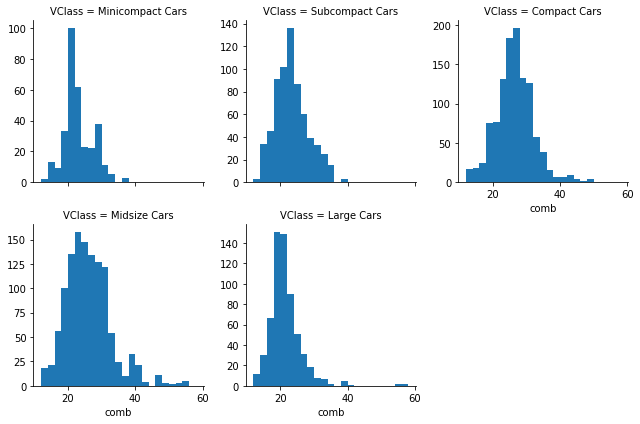

In [70]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = df, col = 'VClass', col_wrap = 3, sharey = False)
g.map(plt.hist, 'comb', bins = bins)


### Line plots

In [71]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bin_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(df['displ'], bins_e, include_lowest = True)
comb_mean = df['comb'].groupby(displ_binned).mean()
comb_std = df['comb'].groupby(displ_binned).std()

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

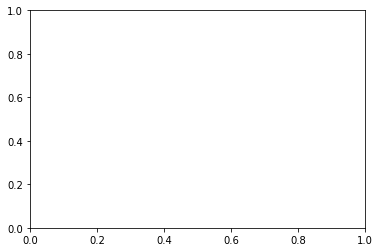

In [75]:
plt.errorbar(x = bin_c, y = comb_mean)

In [73]:
freq = df.make.value_counts()

In [74]:
idx = np.sum(freq > 80)
most_makes = freq.index[:idx]
fuel_econ_sub = df.loc[df['make'].isin(most_makes)]
fuel_econ_sub

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5,Automatic
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,...,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5,Automatic
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,...,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6,Manual
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,...,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4,Automatic
10,32217,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,6,3.8,...,0,18.1909,22.8000,26.7761,37.9000,21.2581,420,5,5,Manual


In [76]:
make_mean = fuel_econ_sub.groupby('make').mean()
comb_order = make_mean.sort_values('comb', ascending = False).index


In [ ]:
comb_order

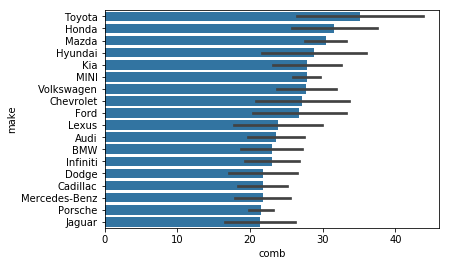

In [77]:
# plotting
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ_sub, x = 'comb', y = 'make', color = base_color, order = comb_order, ci = 'sd')

### Non-positional encoding

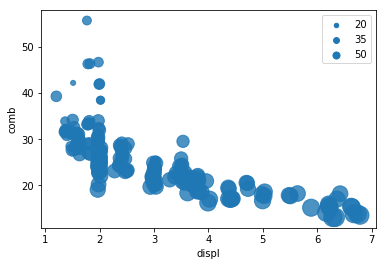

In [78]:
sample = np.random.choice(df.shape[0], 200, replace = False)
fuel_econ_subset = df.loc[sample]
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', x_jitter = 0.04, 
           fit_reg = False,  
           scatter_kws = {'s': fuel_econ_subset['co2']/2});

# dummy series for adding legend
sizes = [20, 35, 50]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)

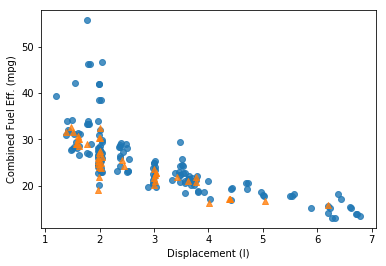

In [79]:
ttype_markers = [['Automatic', 'o'], ['Manual', '^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sb.regplot(data = plot_data, x = 'displ', y = 'comb', x_jitter = 0.04, fit_reg = False, marker = marker);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## Multivariate Exploration of Data
### Color Palettes

/home/e/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


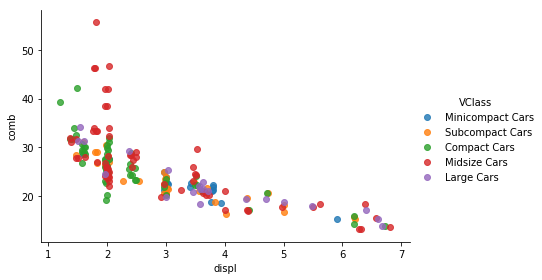

In [80]:
# Caregorical variables
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'VClass',
                 size = 4, aspect = 1.5)
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);

g.add_legend() # adds legend to the plot

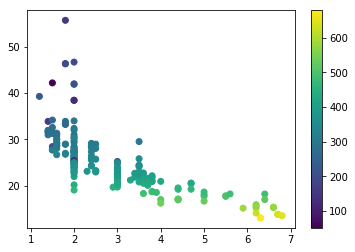

In [81]:
# Numerical variables
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2')
plt.colorbar()

### Changing one axis variables

In [31]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


/home/e/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


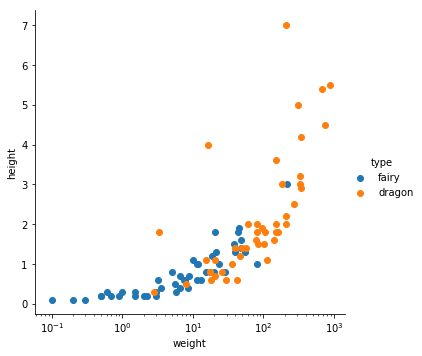

In [68]:
pkmn_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy', 'dragon'])]

g = sb.FacetGrid(data = pkmn_sub, hue = 'type',size = 5)
g.map(plt.scatter, 'weight', 'height')
g.set(xscale = 'log')
# change x_axis variables 
#x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
#g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend()

In [33]:
g = sb.FacetGrid(data = df, col = 'VClass', row = 'trans_type', margin_titles = True)
g.map(plt.scatter, 'displ', 'comb')

KeyError: 'trans_type'

### Adaptation of Bivariate Plots

In [67]:
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'VClass', y = 'comb', hue = 'trans_type',
             ci = 'sd');
plt.xticks(rotation = 15);


ValueError: Could not interpret input 'trans_type'

In [ ]:
base_color = sb.color_palette()[0]
sb.catplot(data = df, x = 'VClass', y = 'comb', hue = 'trans_type');
plt.xticks(rotation = 15);


In [4]:
xbin_edges = np.arange(0.6, 7+0.3, 0.3)
ybin_edges = np.arange(12, 58+3, 3)
plt.hist2d(data = df, x = 'displ', y = 'comb', cmin = 0.5, 
           cmap = 'viridis_r', bins =[xbin_edges, ybin_edges])

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar()

NameError: name 'df' is not defined

In [ ]:
# value to discrete intervals with xbin_edges and ybin_edges
xbin_idxs = pd.cut(df['displ'], xbin_edges, right = False,
                    include_lowest = True, labels = False).astype(int)

ybin_idxs = pd.cut(df['comb'], ybin_edges, right = False,
                    include_lowest = True, labels = False).astype(int)

n_points = df.groupby([xbin_idxs, ybin_idxs]).size()
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values

co2_weights = df['co2']/n_points[xbin_idxs, ybin_idxs]

In [ ]:
xbin_edges = np.arange(0.6, 7+0.3, 0.3)
ybin_edges = np.arange(12, 58+3, 3)
plt.hist2d(data = df, x = 'displ', y = 'comb', cmin = 0.5, 
           cmap = 'viridis_r', bins =[xbin_edges, ybin_edges], weights = co2_weights)

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar()

### Plot Matrices

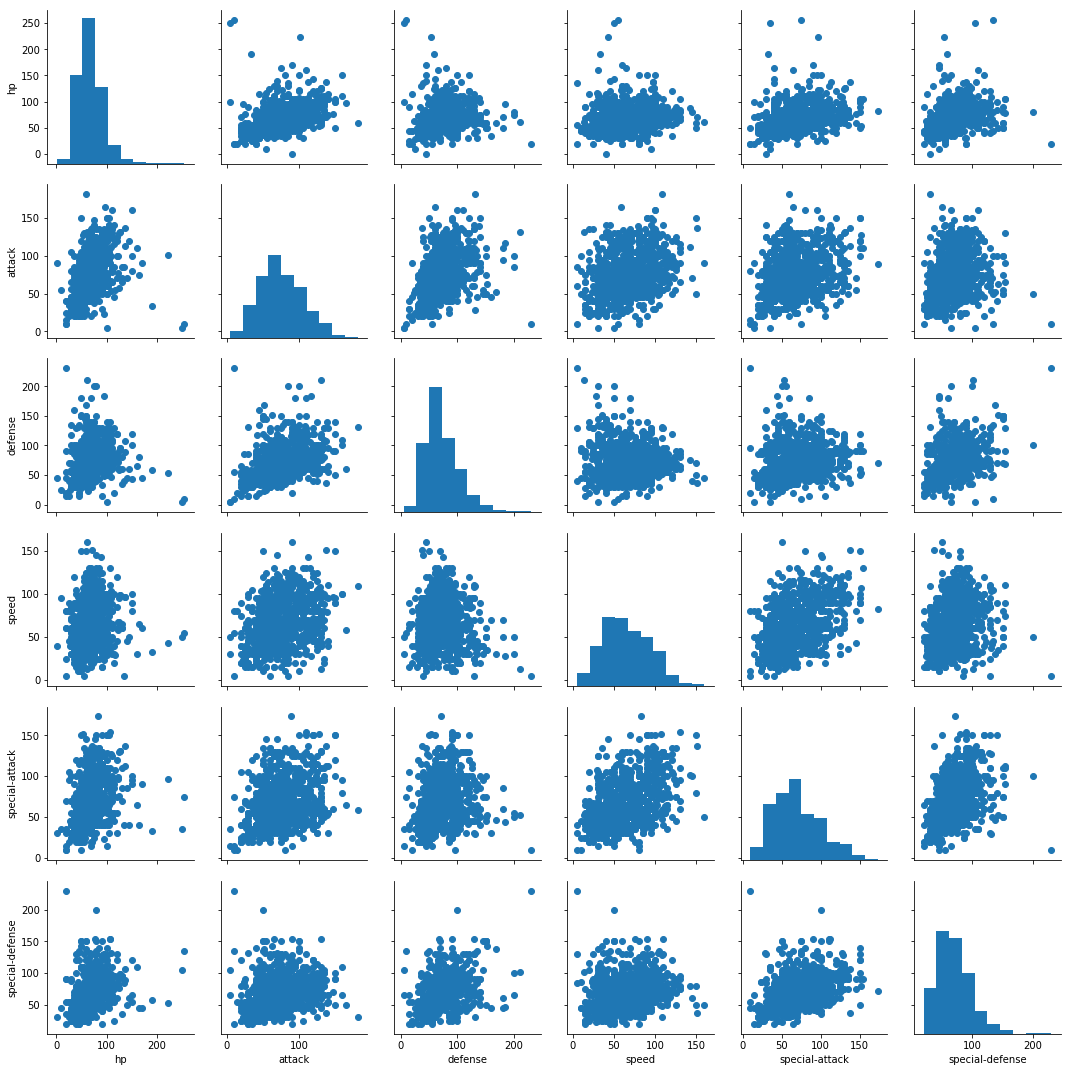

In [6]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data = pokemon, vars = pkmn_stats)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [ ]:
sb.heatmap(pokemon[pkmn_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f', vmin = 0);

### Feature Engineering
#### Feature Engineering is all about creating a new variable with a sum, difference, product, or ration between those original variables that may lend a better insight into the research questions you seek to answer

(0.1767766952966369, 5.656854249492381)

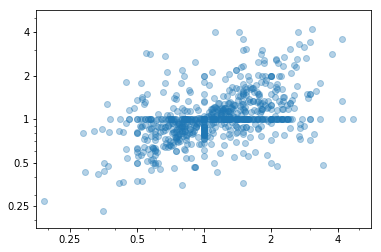

In [5]:
pokemon['attack_ratio'] = pokemon['attack']/pokemon['special-attack']
pokemon['defense_ratio'] = pokemon['defense']/pokemon['special-defense']

plt.scatter(data = pokemon, x = 'attack_ratio', y = 'defense_ratio', alpha = 1/3)
plt.xscale('log')
plt.yscale('log')
tick_loc = [0.25, 0.5, 1, 2, 4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc)
plt.xlim(2**-2.5, 2**2.5)
plt.ylim(2**-2.5, 2**2.5)

/home/e/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


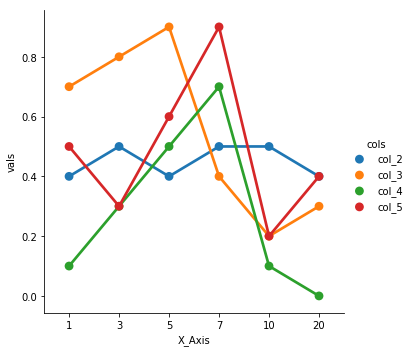

In [30]:
#You need melt for reshape with seaborn.factorplot:



df = pd.DataFrame({'X_Axis':[1,3,5,7,10,20],
                   'col_2':[.4,.5,.4,.5,.5,.4],
                   'col_3':[.7,.8,.9,.4,.2,.3],
                   'col_4':[.1,.3,.5,.7,.1,.0],
                   'col_5':[.5,.3,.6,.9,.2,.4]})



df = df.melt('X_Axis', var_name='cols',  value_name='vals')
g = sb.factorplot(x="X_Axis", y="vals", hue='cols', data=df)

In [ ]:
df